<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">
Première partie 
une clé primaire vérifier si clé unique 
Noté les incohérence dans les jeux de données 
Regarder le nombre de lignes que l'on perd de outer et inner 

Les outliers vérification des prix des bouteilles en question 

Mise à jour du notebook final  </h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Mission </h2>
</div>

Ta première mission se passe en 3 points.

Premièrement, 

j’ai besoin que tu rapproches deux exports : 



        --un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock,
        --un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

 Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU). 

        --Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

        --Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [58]:
#importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

In [59]:
#Importation du fichier population.csv
erp = pd.read_csv('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 5   Optimisez la gestion des données dune boutique avec R ou Python\Ressources\BDD\erp.csv',sep =",",index_col=0)
liaison = pd.read_csv('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 5   Optimisez la gestion des données dune boutique avec R ou Python\Ressources\BDD\liaison.csv',sep =",",index_col=0)
web = pd.read_csv('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 5   Optimisez la gestion des données dune boutique avec R ou Python\Ressources\BDD\web.csv',sep =",",index_col=0)
liaison.rename(columns = {'id_web':'sku'}, inplace = True)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Check des fichiers</h2>
</div>

In [60]:
print(erp.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 38.7+ KB
None


In [61]:
print(liaison.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 19.3+ KB
None


In [62]:
print(web.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [63]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [64]:
erp.shape

(825, 5)

In [65]:
#Check liste des prix 
liste_prix_brut_erp = erp['price'].tolist()
liste_prix_brut_erp.sort()

print("Nombre de prix =>", len(liste_prix_brut_erp))
print("Liste des prix =>", liste_prix_brut_erp)

Nombre de prix => 825
Liste des prix => [5.2, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 6.3, 6.5, 6.5, 6.5, 6.7, 6.8, 6.8, 7.0, 7.0, 7.1, 7.1, 7.1, 7.2, 7.4, 7.4, 7.5, 7.6, 7.6, 7.7, 7.8, 7.8, 7.9, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.5, 8.6, 8.6, 8.7, 8.7, 8.7, 8.7, 8.7, 8.9, 8.9, 8.9, 9.0, 9.0, 9.1, 9.1, 9.1, 9.2, 9.3, 9.3, 9.3, 9.3, 9.3, 9.3, 9.4, 9.5, 9.5, 9.6, 9.6, 9.7, 9.7, 9.7, 9.8, 9.8, 9.8, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 10.0, 10.0, 10.1, 10.1, 10.1, 10.2, 10.2, 10.3, 10.3, 10.4, 10.4, 10.6, 10.6, 10.7, 10.7, 10.7, 10.7, 10.8, 10.8, 10.8, 10.8, 10.9, 10.9, 11.0, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.3, 11.3, 11.5, 11.5, 11.6, 11.6, 11.6, 11.8, 11.9, 11.9, 11.9, 11.9, 11.9, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.1, 12.1, 12.1, 12.2, 12.3, 12.3, 12.4, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 13.0, 13.1, 13.1, 13.2, 13.2, 13.3, 13.3, 13.4, 13.4, 13.4, 13.5, 13.5,

In [66]:
erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [67]:
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [68]:
#Check et séléction des post_type égale à product, retirer les ventes "nan"
liste_champ_web = ['sku','total_sales','post_date','post_title','post_type']
web = web[liste_champ_web]
web = web[web["post_type"].isin(["product"])]
web_vente = web[(web["total_sales"].notna())]
web_vente.shape
web_vente

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
762,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
767,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
768,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
797,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


In [69]:
# Vérification pas de doublons
web_vente[web_vente.duplicated()]

,sku,total_sales,post_date,post_title,post_type


In [70]:
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [71]:
liaison.nunique()

product_id    825
sku           734
dtype: int64

In [72]:
#retire les nan
liaison.dropna(subset=['sku'])
liaison = liaison[(liaison["sku"].notna())]
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Fusion des fichiers </h2>
</div>

In [73]:
#Fusion des dataframes erp avec liaison
erp_liaison = pd.merge(erp,liaison, how = "inner", on = "product_id") 
print(erp_liaison.shape)   
erp_liaison                                                                                    

(734, 6)


,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


In [74]:
liste_prix_brut = erp_liaison['price'].tolist()
liste_prix_brut.sort()

print("Nombre de prix =>", len(liste_prix_brut))
print("Liste des prix =>", liste_prix_brut)

Nombre de prix => 734
Liste des prix => [5.2, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 6.3, 6.5, 6.5, 6.5, 6.7, 6.8, 6.8, 7.0, 7.0, 7.1, 7.1, 7.1, 7.2, 7.4, 7.4, 7.5, 7.6, 7.6, 7.7, 7.8, 7.8, 7.9, 7.9, 8.1, 8.2, 8.3, 8.4, 8.5, 8.5, 8.6, 8.6, 8.7, 8.7, 8.7, 8.7, 8.7, 8.9, 8.9, 8.9, 9.0, 9.0, 9.1, 9.1, 9.2, 9.3, 9.3, 9.3, 9.3, 9.3, 9.3, 9.4, 9.5, 9.5, 9.6, 9.6, 9.7, 9.7, 9.7, 9.8, 9.8, 9.8, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 10.1, 10.1, 10.1, 10.2, 10.2, 10.3, 10.3, 10.4, 10.4, 10.6, 10.6, 10.7, 10.7, 10.7, 10.7, 10.8, 10.8, 10.8, 10.9, 10.9, 11.0, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.3, 11.3, 11.5, 11.5, 11.6, 11.6, 11.6, 11.8, 11.9, 11.9, 11.9, 11.9, 11.9, 12.0, 12.0, 12.0, 12.0, 12.0, 12.1, 12.1, 12.1, 12.2, 12.3, 12.3, 12.4, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 13.0, 13.1, 13.1, 13.2, 13.2, 13.3, 13.3, 13.4, 13.4, 13.4, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.6, 13.

In [75]:
#Fusion des dataframes web_vente avec erp_liaison

web_vente_erp = pd.merge(web_vente, erp_liaison, on ='sku')
web_vente_erp

,sku,total_sales,post_date,post_title,post_type,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product,4954,1,25.0,0,instock
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product,3847,1,24.2,0,outofstock
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,3849,1,34.3,0,outofstock
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,3850,1,20.8,0,outofstock
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...
709,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product,6930,1,8.4,83,instock
710,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product,7023,1,27.5,15,instock
711,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product,7025,1,69.0,2,instock
712,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product,7247,1,54.8,23,instock


In [76]:
liste_prix_brut = web_vente_erp['price'].tolist()
liste_prix_brut.sort()

print("Nombre de prix =>", len(liste_prix_brut))
print("Liste des prix =>", liste_prix_brut)

Nombre de prix => 714
Liste des prix => [5.2, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 6.3, 6.5, 6.5, 6.5, 6.7, 6.8, 6.8, 7.0, 7.0, 7.1, 7.1, 7.1, 7.2, 7.4, 7.4, 7.5, 7.6, 7.6, 7.7, 7.8, 7.8, 7.9, 7.9, 8.1, 8.2, 8.4, 8.5, 8.5, 8.6, 8.6, 8.7, 8.7, 8.7, 8.7, 8.7, 8.9, 8.9, 8.9, 9.0, 9.0, 9.1, 9.1, 9.2, 9.3, 9.3, 9.3, 9.3, 9.3, 9.3, 9.4, 9.5, 9.5, 9.6, 9.6, 9.7, 9.7, 9.7, 9.8, 9.8, 9.8, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 10.1, 10.1, 10.2, 10.2, 10.3, 10.3, 10.4, 10.4, 10.6, 10.6, 10.7, 10.7, 10.7, 10.7, 10.8, 10.8, 10.8, 10.9, 10.9, 11.0, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.3, 11.3, 11.5, 11.5, 11.6, 11.6, 11.6, 11.8, 11.9, 11.9, 11.9, 11.9, 11.9, 12.0, 12.0, 12.0, 12.0, 12.0, 12.1, 12.1, 12.1, 12.2, 12.3, 12.3, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 12.9, 12.9, 12.9, 13.0, 13.1, 13.1, 13.2, 13.2, 13.3, 13.3, 13.4, 13.4, 13.4, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.6, 13.6, 13.7, 13.7, 13.7, 13

In [77]:
web_vente_erp.describe()

,total_sales,product_id,onsale_web,price,stock_quantity
count,714.000000,714.000000,714.0,714.000000,714.000000
mean,4.012605,5032.557423,1.0,32.493137,28.746499
std,8.518183,790.510878,0.0,27.810525,48.012608
min,0.000000,3847.000000,1.0,5.200000,0.000000
25%,0.000000,4280.250000,1.0,14.100000,2.000000
50%,1.000000,4796.000000,1.0,23.550000,12.000000
75%,4.000000,5710.500000,1.0,42.175000,35.000000
max,96.000000,7338.000000,1.0,225.000000,578.000000


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2.1 - Calcul CA par produit et CA Total </h2>
</div>

        --Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

In [78]:
web_vente_erp.columns 

Index(['sku', 'total_sales', 'post_date', 'post_title', 'post_type',
       'product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status'],
      dtype='object')

In [79]:
web_vente_erp["CA_par_product"] = web_vente_erp["total_sales"] * web_vente_erp["price"] 

web_vente_erp["%_CA"] = (web_vente_erp["CA_par_product"]/web_vente_erp["CA_par_product"].sum())*100

liste_champ_ca_produit = ['product_id','post_title','sku','price','total_sales','CA_par_product']
ca_produit = web_vente_erp[liste_champ_ca_produit]
ca_produit


,product_id,post_title,sku,price,total_sales,CA_par_product
0,4954,Bon cadeau de 25€,bon-cadeau-25-euros,25.0,10.0,250.0
1,3847,Pierre Jean Villa Saint-Joseph Préface 2018,15298,24.2,6.0,145.2
2,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296,34.3,0.0,0.0
3,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300,20.8,0.0,0.0
4,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814,14.1,3.0,42.3
...,...,...,...,...,...,...
709,6930,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,16135,8.4,5.0,42.0
710,7023,Camin Larredya Jurançon Sec La Virada 2018,15891,27.5,0.0,0.0
711,7025,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,15887,69.0,0.0,0.0
712,7247,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,13127-1,54.8,0.0,0.0


In [80]:
web_vente_erp["product_id"].count()

714

In [81]:
ca_total_web = ca_produit['CA_par_product'].sum()
ca_total_web

70568.6

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 Analyse univariée </h2>
</div>

In [82]:
### POUR TEST
prix_volume = ca_produit[["price","total_sales","CA_par_product"]].groupby("price", as_index=False).sum()
print(prix_volume.to_string())

      price  total_sales  CA_par_product
0      5.20          0.0             0.0
1      5.70         62.0           353.4
2      5.80         78.0           452.4
3      6.30          2.0            12.6
4      6.50         19.0           123.5
5      6.70          5.0            33.5
6      6.80         12.0            81.6
7      7.00         12.0            84.0
8      7.10         57.0           404.7
9      7.20          0.0             0.0
10     7.40          0.0             0.0
11     7.50          1.0             7.5
12     7.60         36.0           273.6
13     7.70          6.0            46.2
14     7.80         19.0           148.2
15     7.90          5.0            39.5
16     8.10          0.0             0.0
17     8.20          4.0            32.8
18     8.40          5.0            42.0
19     8.50         47.0           399.5
20     8.60         52.0           447.2
21     8.70         47.0           408.9
22     8.90          6.0            53.4
23     9.00     

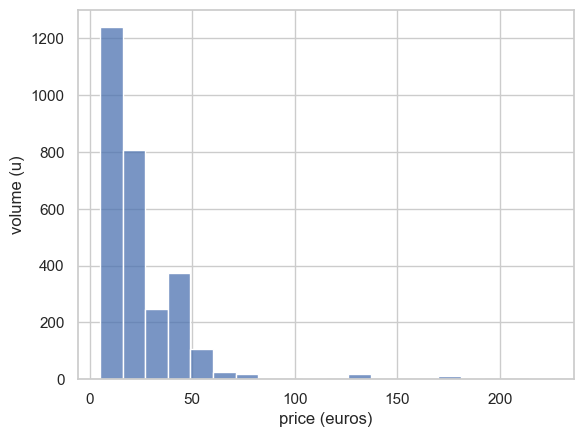

In [83]:
sns.histplot(data=ca_produit, x='price', weights='total_sales', bins=20)
plt.xlabel('price (euros)')
plt.ylabel('volume (u)')
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.1 - Méthode du z score </h2>
</div>

        z = (x - μ) / σ
        z est le z-score
        x est la valeur spécifique
        μ est la moyenne de l'ensemble de données
        σ est l'écart-type de l'ensemble de données

Le z-score permet de déterminer si une valeur particulière se situe au-dessus ou en dessous de la moyenne et dans quelle mesure. Il indique également si une valeur est éloignée ou proche de la moyenne par rapport à la dispersion des données.

Les utilisations courantes des z-scores incluent :

Analyse des performances d'un individu par rapport à un groupe : 

Les z-scores permettent de comparer les performances individuelles à la moyenne d'un groupe et de déterminer si elles se situent au-dessus ou en dessous de la norme.

Analyse des scores de tests et d'évaluations : 

Les z-scores aident à évaluer les résultats des tests en les comparant à une distribution normale de scores.
Identification des valeurs aberrantes : Les valeurs qui ont un z-score élevé (en dehors de la plage typique) peuvent être considérées comme des valeurs aberrantes.

Normalisation des données : 

Les z-scores permettent de standardiser les données en les transformant en une échelle commune, facilitant ainsi les comparaisons entre différentes distributions.
En résumé, le z-score est une mesure statistique utilisée pour évaluer la position relative d'une valeur par rapport à la moyenne d'un ensemble de données et pour comparer des valeurs dans une distribution normale.

In [84]:
liste_prix = ca_produit['price'].tolist()
liste_prix.sort()

print("Nombre de prix =>", len(liste_prix))
print("Liste des prix =>", liste_prix)

Nombre de prix => 714
Liste des prix => [5.2, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 6.3, 6.5, 6.5, 6.5, 6.7, 6.8, 6.8, 7.0, 7.0, 7.1, 7.1, 7.1, 7.2, 7.4, 7.4, 7.5, 7.6, 7.6, 7.7, 7.8, 7.8, 7.9, 7.9, 8.1, 8.2, 8.4, 8.5, 8.5, 8.6, 8.6, 8.7, 8.7, 8.7, 8.7, 8.7, 8.9, 8.9, 8.9, 9.0, 9.0, 9.1, 9.1, 9.2, 9.3, 9.3, 9.3, 9.3, 9.3, 9.3, 9.4, 9.5, 9.5, 9.6, 9.6, 9.7, 9.7, 9.7, 9.8, 9.8, 9.8, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 10.1, 10.1, 10.2, 10.2, 10.3, 10.3, 10.4, 10.4, 10.6, 10.6, 10.7, 10.7, 10.7, 10.7, 10.8, 10.8, 10.8, 10.9, 10.9, 11.0, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.3, 11.3, 11.5, 11.5, 11.6, 11.6, 11.6, 11.8, 11.9, 11.9, 11.9, 11.9, 11.9, 12.0, 12.0, 12.0, 12.0, 12.0, 12.1, 12.1, 12.1, 12.2, 12.3, 12.3, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 12.9, 12.9, 12.9, 13.0, 13.1, 13.1, 13.2, 13.2, 13.3, 13.3, 13.4, 13.4, 13.4, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.6, 13.6, 13.7, 13.7, 13.7, 13

In [85]:
zscore_price = stats.zscore(ca_produit['price'])
threshold = 2
outliers = ca_produit[np.abs(zscore_price) >= threshold]['price'].tolist()
outliers.sort()
print("Nombre d'outliers =>", len(outliers))
print("Liste des outliers =>", outliers)

Nombre d'outliers => 30
Liste des outliers => [88.4, 92.0, 93.0, 99.0, 100.0, 102.3, 104.0, 105.0, 105.0, 105.6, 108.5, 109.6, 112.0, 114.0, 115.0, 115.0, 116.4, 121.0, 121.0, 122.0, 124.8, 126.5, 135.0, 137.0, 157.0, 175.0, 176.0, 191.3, 217.5, 225.0]


In [86]:
ca_produit['zscore'] = (ca_produit.price - ca_produit.price.mean())/ca_produit.price.std()
zscore = ca_produit
zscore

C:\Users\flore\AppData\Local\Temp\ipykernel_8568\338757742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_produit['zscore'] = (ca_produit.price - ca_produit.price.mean())/ca_produit.price.std()


,product_id,post_title,sku,price,total_sales,CA_par_product,zscore
0,4954,Bon cadeau de 25€,bon-cadeau-25-euros,25.0,10.0,250.0,-0.269435
1,3847,Pierre Jean Villa Saint-Joseph Préface 2018,15298,24.2,6.0,145.2,-0.298201
2,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296,34.3,0.0,0.0,0.064970
3,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300,20.8,0.0,0.0,-0.420457
4,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814,14.1,3.0,42.3,-0.661373
...,...,...,...,...,...,...,...
709,6930,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,16135,8.4,5.0,42.0,-0.866332
710,7023,Camin Larredya Jurançon Sec La Virada 2018,15891,27.5,0.0,0.0,-0.179541
711,7025,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,15887,69.0,0.0,0.0,1.312700
712,7247,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,13127-1,54.8,0.0,0.0,0.802101


In [87]:
zscore['zscore_scipy'] = stats.zscore(ca_produit['price'])

C:\Users\flore\AppData\Local\Temp\ipykernel_8568\725441118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore['zscore_scipy'] = stats.zscore(ca_produit['price'])


In [88]:
zscore['Z_outlier'] = abs(zscore['zscore'])>=1
zscore['Z_outlier_scipy'] = abs(zscore['zscore_scipy'])>=1
outlier_zscore = zscore.loc[zscore['Z_outlier']==True]
outlier_zscore.head()


C:\Users\flore\AppData\Local\Temp\ipykernel_8568\2575221880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore['Z_outlier'] = abs(zscore['zscore'])>=1
C:\Users\flore\AppData\Local\Temp\ipykernel_8568\2575221880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore['Z_outlier_scipy'] = abs(zscore['zscore_scipy'])>=1


,product_id,post_title,sku,price,total_sales,CA_par_product,zscore,zscore_scipy,Z_outlier,Z_outlier_scipy
11,4046,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,15269,80.0,6.0,480.0,1.708233,1.709431,True,True
19,4054,Clos du Mont-Olivet Châteauneuf-du-Pape Cuvée ...,19816,71.6,10.0,716.0,1.406189,1.407175,True,True
36,4073,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,13074,77.8,0.0,0.0,1.629126,1.630269,True,True
64,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,15382,100.0,0.0,0.0,2.427385,2.429087,True,True
66,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,11668,88.4,0.0,0.0,2.010277,2.011686,True,True


In [89]:
outlier_zscore.shape

(80, 10)

Un z-score de 1 indique que la valeur spécifique se situe à une distance d'un écart-type au-dessus de la moyenne d'un ensemble de données. En d'autres termes, la valeur est légèrement au-dessus de la moyenne par rapport à la dispersion des données.

Si la distribution des données suit une distribution normale, environ 68% des valeurs se situent dans une plage d'un écart-type de part et d'autre de la moyenne. Ainsi, avec un z-score de 1, la valeur spécifique se trouve approximativement dans le quart supérieur de la distribution.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.2 - Méthode des interquartiles  </h2>
</div>

In [90]:
# Calculer les quantiles
quantiles = zscore['price'].quantile([0, 0.25, 0.5, 0.75, 1])

# Formater les quantiles avec une précision spécifique
quantiles = quantiles.apply(lambda x: format(x, '.2f'))

# Afficher les quantiles
print(quantiles)


0.00      5.20
0.25     14.10
0.50     23.55
0.75     42.18
1.00    225.00
Name: price, dtype: object


In [91]:
mediane = zscore['price'].median()
q1 = np.percentile(zscore['price'], 25)
q3 = np.percentile(zscore['price'], 75)
iqr = q3 - q1
binf = max(zscore["price"].min(),q1-1.5*iqr)
bsup = min(zscore["price"].max(),q3 + 1.5*iqr)

print("Mediane :",mediane)
print("Q1 :",q1)
print("Q3 :",q3)
print("IQR :",iqr)
print("Borne inférieure :",binf)
print("Borne supérieure :",bsup)

Mediane : 23.55
Q1 : 14.1
Q3 : 42.175000000000004
IQR : 28.075000000000003
Borne inférieure : 5.2
Borne supérieure : 84.28750000000001


In [92]:
zscore['Interval_outliers'] = zscore['price'].apply(lambda x: x<binf or x>bsup)
outliers_IQR = zscore.loc[zscore['Interval_outliers']==True]

C:\Users\flore\AppData\Local\Temp\ipykernel_8568\2984893553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscore['Interval_outliers'] = zscore['price'].apply(lambda x: x<binf or x>bsup)


In [93]:
outliers_IQR.head()

,product_id,post_title,sku,price,total_sales,CA_par_product,zscore,zscore_scipy,Z_outlier,Z_outlier_scipy,Interval_outliers
64,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,15382,100.0,0.0,0.0,2.427385,2.429087,True,True,True
66,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,11668,88.4,0.0,0.0,2.010277,2.011686,True,True,True
200,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,15940,225.0,5.0,1125.0,6.922087,6.926939,True,True,True
202,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12589,126.5,11.0,1391.5,3.380262,3.382632,True,True,True
206,4359,Champagne Larmandier-Bernier Grand Cru Les Che...,13853,85.6,1.0,85.6,1.909596,1.910934,True,True,True


In [94]:
outlier_merged = pd.concat([outlier_zscore, outliers_IQR]).sort_values(by="product_id", ascending=True)

In [95]:
outlier_merged.head()

,product_id,post_title,sku,price,total_sales,CA_par_product,zscore,zscore_scipy,Z_outlier,Z_outlier_scipy,Interval_outliers
11,4046,Pierre Gaillard Côte Rôtie Rose Pourpre 2017,15269,80.0,6.0,480.0,1.708233,1.709431,True,True,NaN
19,4054,Clos du Mont-Olivet Châteauneuf-du-Pape Cuvée ...,19816,71.6,10.0,716.0,1.406189,1.407175,True,True,NaN
36,4073,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,13074,77.8,0.0,0.0,1.629126,1.630269,True,True,NaN
64,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,15382,100.0,0.0,0.0,2.427385,2.429087,True,True,True
64,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,15382,100.0,0.0,0.0,2.427385,2.429087,True,True,NaN


In [96]:
outlier_merged = outlier_merged.loc[(outlier_merged['Z_outlier']==True) & (outlier_merged['Interval_outliers']==True)]
outlier_merged['outlier'] = "OUI"
outlier_merged


,product_id,post_title,sku,price,total_sales,CA_par_product,zscore,zscore_scipy,Z_outlier,Z_outlier_scipy,Interval_outliers,outlier
64,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,15382,100.0,0.0,0.0,2.427385,2.429087,True,True,True,OUI
66,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,11668,88.4,0.0,0.0,2.010277,2.011686,True,True,True,OUI
200,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,15940,225.0,5.0,1125.0,6.922087,6.926939,True,True,True,OUI
202,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12589,126.5,11.0,1391.5,3.380262,3.382632,True,True,True,OUI
206,4359,Champagne Larmandier-Bernier Grand Cru Les Che...,13853,85.6,1.0,85.6,1.909596,1.910934,True,True,True,OUI
219,4402,Cognac Frapin VIP XO,3510,176.0,13.0,2288.0,5.160164,5.163781,True,True,True,OUI
220,4404,Cognac Frapin Château de Fontpinot XO,3507,108.5,2.0,217.0,2.733025,2.734941,True,True,True,OUI
222,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,7819,157.0,0.0,0.0,4.476969,4.480108,True,True,True,OUI
223,4407,Cognac Frapin Cigar Blend,3509,104.0,1.0,104.0,2.571216,2.573018,True,True,True,OUI
228,4582,Château de Meursault Puligny-Montrachet 1er Cr...,12857,109.6,0.0,0.0,2.772578,2.774522,True,True,True,OUI


In [97]:
outlier_merged.describe()

,product_id,price,total_sales,CA_par_product,zscore,zscore_scipy
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5267.937500,124.571875,1.406250,217.812500,3.310931,3.313252
std,766.699964,36.068727,3.109397,505.080853,1.296945,1.297854
min,4115.000000,85.600000,0.000000,0.000000,1.909596,1.910934
25%,4406.750000,103.575000,0.000000,0.000000,2.555934,2.557726
50%,5025.500000,114.500000,0.000000,0.000000,2.948771,2.950838
75%,5970.000000,128.625000,1.250000,132.250000,3.456672,3.459095
max,6216.000000,225.000000,13.000000,2288.000000,6.922087,6.926939


In [98]:
ca_produit_outlier=pd.merge(zscore, outlier_merged, how='left')

In [99]:
ca_produit_outlier = ca_produit_outlier.loc[(ca_produit_outlier['outlier']=='OUI') | (ca_produit_outlier['outlier']!='OUI')]


In [100]:
ca_produit_outlier.head()

,product_id,post_title,sku,price,total_sales,CA_par_product,zscore,zscore_scipy,Z_outlier,Z_outlier_scipy,Interval_outliers,outlier
0,4954,Bon cadeau de 25€,bon-cadeau-25-euros,25.0,10.0,250.0,-0.269435,-0.269624,False,False,False,NaN
1,3847,Pierre Jean Villa Saint-Joseph Préface 2018,15298,24.2,6.0,145.2,-0.298201,-0.298410,False,False,False,NaN
2,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296,34.3,0.0,0.0,0.064970,0.065016,False,False,False,NaN
3,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300,20.8,0.0,0.0,-0.420457,-0.420752,False,False,False,NaN
4,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814,14.1,3.0,42.3,-0.661373,-0.661837,False,False,False,NaN


In [101]:
ca_produit_outlier = ca_produit_outlier.fillna("NON")

In [102]:
ca_produit_outlier

,product_id,post_title,sku,price,total_sales,CA_par_product,zscore,zscore_scipy,Z_outlier,Z_outlier_scipy,Interval_outliers,outlier
0,4954,Bon cadeau de 25€,bon-cadeau-25-euros,25.0,10.0,250.0,-0.269435,-0.269624,False,False,False,NON
1,3847,Pierre Jean Villa Saint-Joseph Préface 2018,15298,24.2,6.0,145.2,-0.298201,-0.298410,False,False,False,NON
2,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,15296,34.3,0.0,0.0,0.064970,0.065016,False,False,False,NON
3,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,15300,20.8,0.0,0.0,-0.420457,-0.420752,False,False,False,NON
4,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,19814,14.1,3.0,42.3,-0.661373,-0.661837,False,False,False,NON
...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,16135,8.4,5.0,42.0,-0.866332,-0.866939,False,False,False,NON
710,7023,Camin Larredya Jurançon Sec La Virada 2018,15891,27.5,0.0,0.0,-0.179541,-0.179667,False,False,False,NON
711,7025,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,15887,69.0,0.0,0.0,1.312700,1.313620,True,True,False,NON
712,7247,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,13127-1,54.8,0.0,0.0,0.802101,0.802664,False,False,False,NON


In [103]:
ca_produit_outlier.describe()

,product_id,price,total_sales,CA_par_product,zscore,zscore_scipy
count,714.000000,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02
mean,5032.557423,32.493137,4.012605,98.835574,1.990316e-17,9.951579e-18
std,790.510878,27.810525,8.518183,307.685071,1.000000e+00,1.000701e+00
min,3847.000000,5.200000,0.000000,0.000000,-9.813960e-01,-9.820840e-01
25%,4280.250000,14.100000,0.000000,0.000000,-6.613733e-01,-6.618369e-01
50%,4796.000000,23.550000,1.000000,15.250000,-3.215738e-01,-3.217993e-01
75%,5710.500000,42.175000,4.000000,91.150000,3.481366e-01,3.483807e-01
max,7338.000000,225.000000,96.000000,4704.000000,6.922087e+00,6.926939e+00


In [104]:
valeur_outlier = ca_produit_outlier["outlier"].unique().tolist()
valeur_outlier

['NON', 'OUI']

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5.3 - Méthode graphique avec un scatter plot (outliers en rouge, separation en deux df)  </h2>
</div>

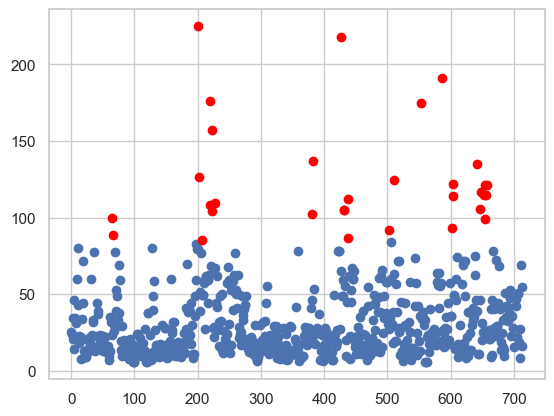

In [105]:
# On se créé 2 DataFrame pour séparé les couleurs
only_ok = ca_produit_outlier[(ca_produit_outlier['price'] < bsup) & (ca_produit_outlier['price'] > binf)]
only_outliers = ca_produit_outlier[(ca_produit_outlier['price'] > bsup) | (ca_produit_outlier['price'] < binf)]

# On plot
plt.scatter(only_ok['price'].index, only_ok['price'].values)
plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">

5.4 - Méthode graphique avec boxplot()  </h2>
</div>

<AxesSubplot: xlabel='price'>

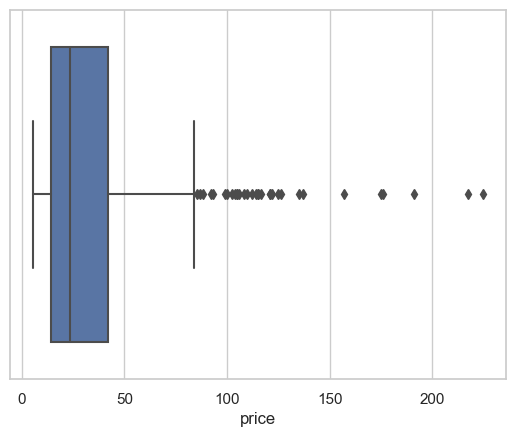

In [106]:
# on plot
sns.set(style="whitegrid") 
sns.boxplot(x = 'price', data = ca_produit) 